# Generate Training Data

In order to train the discriminative models, we need training data. To this end, we create synthetic training data via a simple simulation of kicks on goal. The algorithm works as follows:

- Sample a position (i.e. $x \in [0, 1]$ and $y \in [0, 2]$)
- Sample from one of the possible ranges `{wide-left`, `block-left`, `block-center`, `block-right`, `wide-right}`
- Sample from one the possible powers `{weak`, `strong}`
- Kick!
- Record each sample

In [46]:
from collections import namedtuple

Range = namedtuple('Range', ['begin', 'end'])

width, height = 2, 2
center = 2, 1
nao_width = .1
block_center = Range(1-(nao_width/2), 1+(nao_width/2))
block_left = Range(block_center.begin-.3, block_center.begin)
wide_left = Range(0, block_left.begin)
block_right = Range(block_center.end, block_center.end+.3)
wide_right = Range(block_right.end, 2)

### Generate Random Kicks Into the Center of the Goal

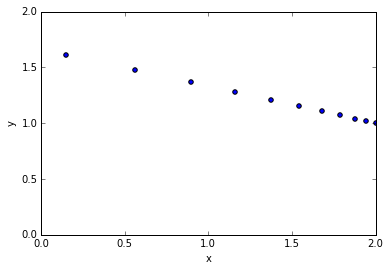

In [19]:
import math
import random

from ipywidgets import interact, fixed

time_steps = 10
decay = .8

x_start, y_start = random.uniform(0, 1), random.uniform(0, 2)

@interact(x_start=fixed(x_start), y_start=fixed(y_start), time_step=(0, time_steps), time_steps=fixed(time_steps), decay=fixed(decay))
def plot(x_start, y_start, time_step, time_steps, decay):
    x_goal, y_goal = 2, 1
    
    # Calculate initial dx and dy necessary to get the ball to the goal after time_steps
    c = (1-decay) / (1-decay**time_steps)
    dx = c * (x_goal-x_start)
    dy = c * (y_goal-y_start)
    
    # Calculate how far you've traveled from the start at each time_step
    decays = [decay**pow for pow in range(time_step)]
    x_deltas = np.append([0], np.cumsum(dx*np.array(decays)))
    y_deltas = np.append([0], np.cumsum(dy*np.array(decays)))
    
    x_positions = x_start + x_deltas
    y_positions = y_start + y_deltas
    
    axes = pd.DataFrame({'x': x_positions,
                         'y': y_positions}).plot(kind='scatter', x='x', y='y')
    
    axes.set_xlim(0, 2)
    axes.set_ylim(0, 2)